# Evaluation of the equilibrium runs
Model output produced by the `equlibrium_run.py` script.

In [1]:
# import section
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

Read the output of the VAS model.

In [34]:
# specify path and read datasets
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq.nc'
ds = xr.open_dataset(path)
# sort by temperature bias
ds = ds.sortby('temp_bias')
# longtime run (1000 years)
path = '/Users/oberrauch/work/master/data/eq_runs/hef_eq_1e4.nc'
ds_long = xr.open_dataset(path)
# sort by temperature bias
ds_long = ds_long.sortby('temp_bias')

Define some colors...

In [24]:
# define color cycles
vas_cycle = np.array(['#3D348B', '#6DAEDB', '#FFAE03', '#FB6107', '#1B5299', '#3C1518'])
fl_cycle = np.array(['#12130F', '#426A5A', '#BF3B2F', '#7FB685', '#F2C57C', '#2B2D42'])


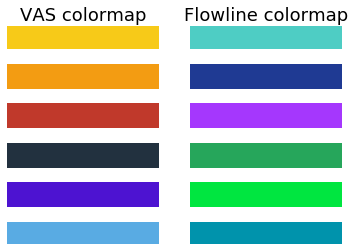

In [35]:
# define color cycles
vas_cycle = np.array(['#f7ca18', '#f39c12', '#c0392b', '#22313f', '#4d13d1', '#59abe3'])
fl_cycle = np.array(["#4ecdc4", "#1f3a93", "#a537fd", "#26a65b", "#00e640", "#0093ac"])
             
fig, ax = plt.subplots(1,2)
for i in np.arange(vas_cycle.size):
    ax[0].axhline(i, c=vas_cycle[i], lw='25')
    ax[1].axhline(i, c=fl_cycle[i], lw='25')

ax[0].set_title('VAS colormap', fontsize=18)
ax[1].set_title('Flowline colormap', fontsize=18)
    
for ax_ in ax:
    ax_.invert_yaxis()
    ax_.axis('off')

<xarray.Dataset>
Dimensions:         (mb_model: 1, model: 2, normalized: 2, temp_bias: 3, time: 10001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
  * temp_bias       (temp_bias) float64 0.0 0.5 -0.5
  * normalized      (normalized) bool False True
  * model           (model) object 'vas' 'fl'
  * mb_model        (mb_model) object 'random'
Data variables:
    volume          (mb_model, model, normalized, temp_bias, time) float64 ...
    area            (mb_model, model, normalized, temp_bias, time) float64 ...
    length          (mb_model, model, normalized, temp_bias, time) float64 ...
    ela             (mb_model, model, normalized, temp_bias, time) float64 ...

In [32]:
ds_long.sortby('temp_bias')

<xarray.Dataset>
Dimensions:         (mb_model: 1, model: 2, normalized: 2, temp_bias: 3, time: 10001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 9.998e+03 9.999e+03 1e+04
    hydro_year      (time) int64 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999 10000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 -1 0 1 2 3 4 ... 9994 9995 9996 9997 9998 9999
    calendar_month  (time) int64 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10
  * temp_bias       (temp_bias) float64 -0.5 0.0 0.5
  * normalized      (normalized) object False True
  * model           (model) object 'vas' 'fl'
  * mb_model        (mb_model) object 'random'
Data variables:
    volume          (mb_model, model, normalized, temp_bias, time) float64 5.963e+08 ... 0.6025
    area            (mb_model, model, normalized, temp_bias, time) float64 8.036e+06 ... 0.739
    length          (mb_model, model, normalized, temp_bias, time) float64 4.89

In [59]:
tmp = ds.sel(model='fl', mb_model='constant', normalized=True, temp_bias=-0.5)
tmp.length.to_dataframe().describe()[['length']]

,length
count,3001.000000
mean,1.419536
std,0.079558
min,1.000000
25%,1.434783
50%,1.434783
75%,1.449275
max,1.449275


In [63]:
tmp = ds.sel(model='fl', mb_model='constant', normalized=True, temp_bias=+0.5)
tmp.length.to_dataframe().describe()[['length']]

,length
count,3001.000000
mean,0.614723
std,0.060126
min,0.594203
25%,0.594203
50%,0.608696
75%,0.608696
max,1.028986


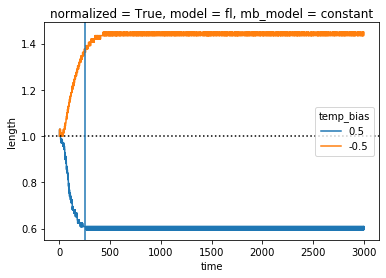

In [66]:
tmp = ds.sel(model='fl', mb_model='constant', normalized=True, temp_bias=[0.5, -0.5])
tmp.length.plot(hue='temp_bias')
plt.axhline(1, c='k', ls=':')
plt.axvline(250)

In [45]:
stattools.acf(tmp.length, nlags=1000)

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.9647924 ,  0.98487674, ..., -0.00789837,
       -0.02453772, -0.00794054])

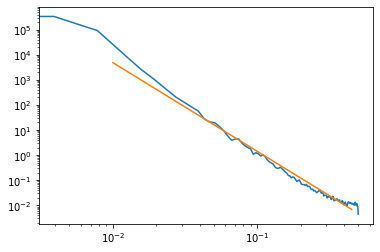

In [343]:
plt.loglog(freqs,psd)
plt.plot([0.01, 0.45], np.exp(lin_mod.intercept_)*[0.01, 0.45]**lin_mod.coef_)

In [359]:
sel = ds.sel(mb_model='random', temp_bias=+0.5, normalized=True)
acf_fl = stattools.acf(sel.sel(model='fl').length, nlags=nlags)
acf_vas = stattools.acf(sel.sel(model='vas').length, nlags=nlags)

In [367]:
diff = acf_fl - acf_vas
np.where(abs(diff) > 0.04)

(array([  78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  146,  147,  148,  149,  150,  151,  152,  153,  154,
         155,  156,  157,  158,  159,  160,  161,  162,  163,  164,  165,
         166,  167,  168,  169,  170,  171,  172,  173,  174,  175,  176,
         177,  178,  179,  180,  181,  182,  183,  184,  185,  186,  187,
         188,  189,  190,  191,  192,  193,  194,  195,  196,  197,  198,
         199,  200,  201,  202,  203,  204,  205,  206,  207,  208,  209,
         210,  211,  212,  213,  214,  215,  216,  217,  218,  219,  220,
         221,  222,  223,  224,  225, 

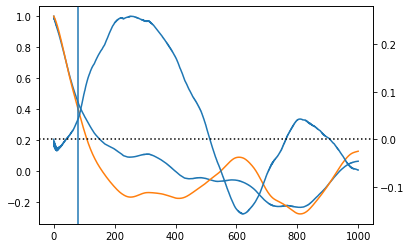

In [368]:
plt.plot(acf_fl)
plt.plot(acf_vas)
ax = plt.twinx()
ax.plot(acf_fl - acf_vas)
ax.axhline(0, c='k', ls=':')
ax.axvline(78)

In [411]:
nlags = 1000
acf = list()

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    # plot autocorrelation
    acf.append(stattools.acf(length.sel(model='vas'), nlags=nlags))
    acf.append(stattools.acf(length.sel(model='fl'), nlags=nlags))

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [424]:
tmp = pd.DataFrame(acf).T.loc[500:]

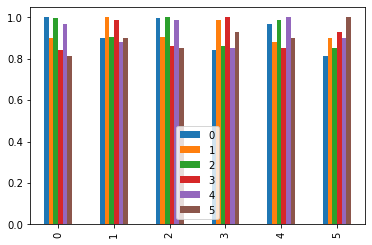

In [423]:
tmp.corr().plot(kind='bar')

In [426]:
tmp.corr()

,0,1,2,3,4,5
0,1.000000,0.963232,0.981132,0.965895,0.870564,0.454252
1,0.963232,1.000000,0.912701,0.962406,0.754808,0.299959
2,0.981132,0.912701,1.000000,0.965047,0.949235,0.607038
3,0.965895,0.962406,0.965047,1.000000,0.884252,0.519529
4,0.870564,0.754808,0.949235,0.884252,1.000000,0.807158
5,0.454252,0.299959,0.607038,0.519529,0.807158,1.000000


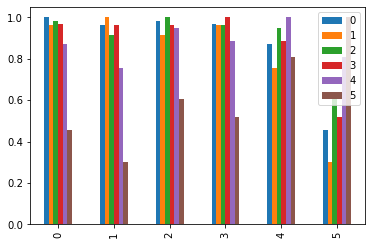

In [425]:
tmp.corr().plot(kind='bar')

0    1.000000
1    0.899510
2    0.995631
3    0.841870
4    0.968609
5    0.815279
Name: 0, dtype: float64
0    0.899510
1    1.000000
2    0.905809
3    0.986294
4    0.881083
5    0.899348
Name: 1, dtype: float64
0    0.995631
1    0.905809
2    1.000000
3    0.861013
4    0.985430
5    0.853241
Name: 2, dtype: float64
0    0.841870
1    0.986294
2    0.861013
3    1.000000
4    0.853508
5    0.931013
Name: 3, dtype: float64
0    0.968609
1    0.881083
2    0.985430
3    0.853508
4    1.000000
5    0.902098
Name: 4, dtype: float64
0    0.815279
1    0.899348
2    0.853241
3    0.931013
4    0.902098
5    1.000000
Name: 5, dtype: float64


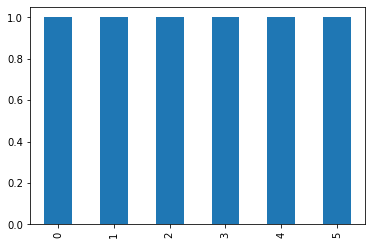

In [422]:
for idx, row in tmp.corr().iterrows():
    print(row)
    row.plot(kind='bar')
    

In [398]:
acf.append(acf[0])

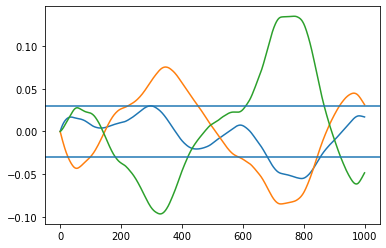

In [406]:
plt.plot(np.diff(acf, axis=0).T)
plt.axhline(0.03)
plt.axhline(-0.03)

In [388]:
((tmp[2] - tmp[1]) ** 2).mean() ** .5

0.02755272646001599

In [376]:
pd.DataFrame(acf).T.corr()

,0,1,2
0,1.000000,0.995631,0.968609
1,0.995631,1.000000,0.985430
2,0.968609,0.985430,1.000000


In [266]:
from scipy.optimize import curve_fit

In [316]:
def exp_fit(x,a,b,c):
    return a*np.exp(b*x)+c

def my_exp(x, a, b):
    return a * x**b

curve_fit(my_exp, x, y)

(array([ 2.86088153e-06, -4.97090449e+00]),
 array([[4.26235643e-14, 3.36420383e-09],
        [3.36420383e-09, 2.65616082e-04]]))

In [296]:
x_test

array([0.01      , 0.01098541, 0.01206793, 0.01325711, 0.01456348,
       0.01599859, 0.01757511, 0.01930698, 0.02120951, 0.02329952,
       0.02559548, 0.02811769, 0.03088844, 0.03393222, 0.03727594,
       0.04094915, 0.04498433, 0.04941713, 0.05428675, 0.05963623,
       0.06551286, 0.07196857, 0.07906043, 0.08685114, 0.09540955,
       0.10481131, 0.11513954, 0.12648552, 0.13894955, 0.1526418 ,
       0.16768329, 0.184207  , 0.20235896, 0.22229965, 0.24420531,
       0.26826958, 0.29470517, 0.32374575, 0.35564803, 0.39069399,
       0.42919343, 0.47148664, 0.51794747, 0.5689866 , 0.62505519,
       0.68664885, 0.75431201, 0.82864277, 0.91029818, 1.        ])

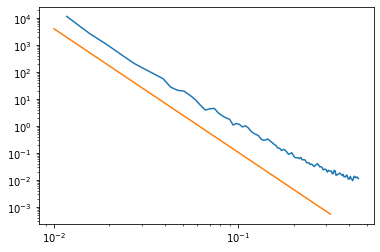

In [322]:
plt.loglog(x,y)
x_test = np.logspace(-2, -0.5)
def my_exp(x, a, b):
    return a * x**b
plt.loglog(x_test, my_exp(x_test, 2.86088153e-06, -4.57090449e+00))

In [255]:
from sklearn import linear_model

# instance linear regression model and fit
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x, y)
# get results
r_sq = lin_mod.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', lin_mod.intercept_)
print('slope:', lin_mod.coef_)

coefficient of determination: 0.04837705188775099
intercept: 577.5116644288851
slope: [-1890.25091272]


In [227]:
freqs[freqs > 0.4]

array([0.40234375, 0.40625   , 0.41015625, 0.4140625 , 0.41796875,
       0.421875  , 0.42578125, 0.4296875 , 0.43359375, 0.4375    ,
       0.44140625, 0.4453125 , 0.44921875, 0.453125  , 0.45703125,
       0.4609375 , 0.46484375, 0.46875   , 0.47265625, 0.4765625 ,
       0.48046875, 0.484375  , 0.48828125, 0.4921875 , 0.49609375,
       0.5       ])

In [224]:
psd[freqs > 0.4]

array([0.01165155, 0.01357517, 0.01150832, 0.01064854, 0.00954528,
       0.01168072, 0.0137556 , 0.01368368, 0.01229618, 0.0122813 ,
       0.01306588, 0.01226588, 0.0113893 , 0.01210179, 0.01148023,
       0.011177  , 0.01119864, 0.01012375, 0.01246499, 0.01324827,
       0.01072287, 0.00992346, 0.01174714, 0.00927045, 0.00891361,
       0.00447841])

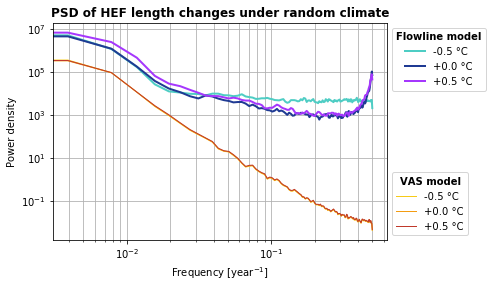

In [36]:
# load module for the spectral analysis
from scipy import signal

fig, ax = plt.subplots(1,1)

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').length

    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='fl').values.flatten()
    freqs, psd = signal.welch(sig)
    ax.loglog(freqs, psd, label='{:+.1f} °C'.format(b), c=fl_cycle[i], lw=2)

for i, b in enumerate(np.sort(ds.temp_bias)):
    # select values by temperature bias
    ds_tmp = ds_long.sel(temp_bias=b, normalized=False, mb_model='random').length
    
    # compute the power of the signel per frequency band
    sig = ds_tmp.sel(model='vas').values.flatten()
    freqs, psd = signal.welch(sig)
    ax.loglog(freqs, psd, label='{:+.1f} °C'.format(b), c=vas_cycle[i], lw=1)
    
# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax.legend(handles[:3], labels[:3], bbox_to_anchor=(1, 1), loc='upper left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax.legend(handles[3:], labels[3:], bbox_to_anchor=(1, 0), loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})
ax.add_artist(leg_fl)

# add grid
ax.grid(which='both')

# title, labels, ...
ax.set_title('PSD of HEF length changes under random climate', {'weight': 'bold'})
ax.set_xlabel('Frequency [year$^{-1}$]')
ax.set_ylabel('Power density')

# store plot
plt.savefig('psd_length_random.pdf', bbox_inches='tight')

In [211]:
# compute the power of the signel per frequency band
sig = ds_long.sel(temp_bias=0, normalized=False, mb_model='random', model='fl').length.values.flatten()
freqs, psd = signal.welch(sig)

In [212]:
psd

array([8.05830164e+05, 4.46446433e+06, 1.19170188e+06, 1.74828944e+05,
       3.74127040e+04, 1.66097224e+04, 1.11906996e+04, 7.28237146e+03,
       5.73543120e+03, 7.89554155e+03, 7.08704919e+03, 5.63083882e+03,
       4.79205509e+03, 4.37446652e+03, 3.75993028e+03, 3.90761717e+03,
       3.92408200e+03, 3.30591590e+03, 2.53169026e+03, 2.94740249e+03,
       2.48997661e+03, 1.95646273e+03, 2.03201672e+03, 1.89646805e+03,
       1.64428625e+03, 1.59826912e+03, 1.40309381e+03, 1.54386909e+03,
       1.86930829e+03, 1.45043102e+03, 1.57003895e+03, 1.41923130e+03,
       1.19507170e+03, 9.82111847e+02, 1.24717639e+03, 1.09975045e+03,
       8.98769441e+02, 9.33320425e+02, 1.18515501e+03, 1.13694073e+03,
       1.08879163e+03, 1.23352885e+03, 1.16521398e+03, 1.19020896e+03,
       1.04551539e+03, 1.02795134e+03, 1.02550178e+03, 7.76739781e+02,
       9.15639075e+02, 1.01868967e+03, 1.04073334e+03, 9.15453370e+02,
       9.09555573e+02, 8.40016797e+02, 7.73003803e+02, 5.93570856e+02,
      

In [213]:
psd[freqs >= 0.1][:-1].mean()

4274.929674469337

(500.0, 6000.0)

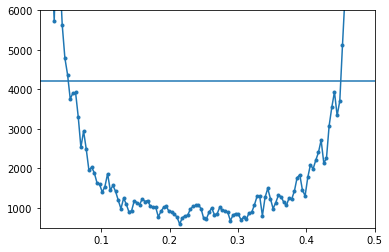

In [217]:
plt.plot(freqs, psd, marker='.')
plt.axhline(4.21831307e+03)
plt.xlim([0.01, 0.5])
plt.ylim([0.5e3, 6e3])

In [16]:
from statsmodels.tsa import stattools

In [21]:
acf_plus = stattools.acf(ds_long.sel(model='fl', mb_model='random', normalized=False, temp_bias=0.5).length, nlags=nlags)
acf_minus = stattools.acf(ds_long.sel(model='fl', mb_model='random', normalized=False, temp_bias=-0.5).length, nlags=nlags)

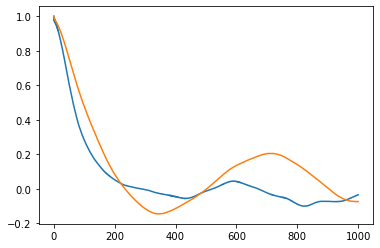

In [23]:
plt.plot(acf_plus)
plt.plot(acf_minus)

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


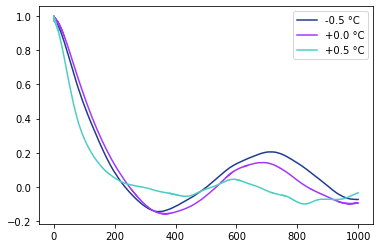

In [18]:
fig, ax = plt.subplots(1,1)

nlags = 1000

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    # plot autocorrelation
    ax.plot(stattools.acf(length.sel(model='fl'), nlags=nlags), c=fl_cycle[i], label='{:+.1f} °C'.format(b))
    
plt.legend()

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(0, 200)

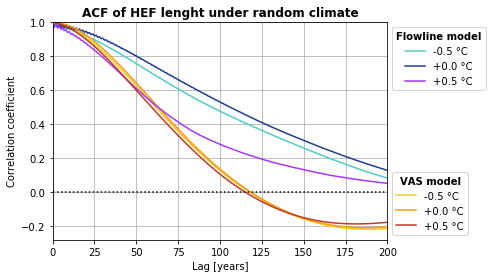

In [37]:
fig, ax = plt.subplots(1,1)

nlags = 1000

for i, b in enumerate(np.sort(ds.temp_bias)):
    # get length data
    length = ds_long.sel(mb_model='random', normalized=False, temp_bias=b).length
    # plot autocorrelation
    ax.plot(stattools.acf(length.sel(model='fl'), nlags=nlags), c=fl_cycle[i], label='{:+.1f} °C'.format(b))
    ax.plot(stattools.acf(length.sel(model='vas'), nlags=nlags), c=vas_cycle[i], label='{:+.1f} °C'.format(b))

# aux line
ax.axhline(0, c='k', ls=':')
# adjust axes
ax.set_xlim([0, nlags])
ylim = ax.get_ylim()
ax.set_ylim([min(ylim), 1])
# add grid
ax.grid()

# get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# add a seperate legend for each model
leg_fl = ax.legend(handles[::2], labels[::2], bbox_to_anchor=(1, 1), loc='upper left')
leg_fl.set_title('Flowline model', {'weight': 'bold'})
leg_vas = ax.legend(handles[1::2], labels[1::2], bbox_to_anchor=(1, 0), loc='lower left')
leg_vas.set_title('VAS model', {'weight': 'bold'})
ax.add_artist(leg_fl)

# labels, title, ...
ax.set_title('ACF of HEF lenght under random climate', {'weight': 'bold'})
ax.set_xlabel('Lag [years]')
ax.set_ylabel('Correlation coefficient')

# store plot
plt.savefig('acf_length_random.pdf', bbox_inches='tight')

plt.xlim([0, 200])

### Time series

In [74]:
def plot_time_series(ds, var, title='', suptitle=''):
    # plot relative volume change
    fig, [ax0, ax1] = plt.subplots(1, 2, figsize=[10, 5])

    # flowline model
    ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, color='lightgray', lw=0.5)
    # vas model
    ax0.set_prop_cycle('color', vas_cycle)
    handles_vas = ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax0, add_legend=False, lw=1)
    labels_vas = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]
    
    # set axes limits
    ax0.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax0.get_ylim()
    ax0.set_ylim([ylim[0]*0.5, ylim[1]])
    
    # title, labels, legend
    ax0.set_title('Volume area scaling model')
    ax0.set_xlabel('Years of model evolution')
    ax0.legend(handles_vas, labels_vas, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    if ds.normalized:
        # add ylabel
        ax0.set_ylabel('Relative {}'.format(var))
        # aux line
        ax0.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax0.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax0.axhline(ds.sel(model='vas')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax0.grid()

    # vas model
    ds.sel(model='vas')[var].plot(hue='temp_bias', ax=ax1, add_legend=False, color='lightgray', lw=0.5)
    # flowline model
    ax1.set_prop_cycle('color', fl_cycle)
    handles_fl = ds.sel(model='fl')[var].plot(hue='temp_bias', ax=ax1, add_legend=False)
    labels_fl = ['{:+.1f} °C'.format(bias) for bias in ds.temp_bias.values]

    # set axes limits
    ax1.set_xlim([ds.time.min(), ds.time.max()])
    ylim = ax1.get_ylim()
    ax1.set_ylim([ylim[0]*0.5, ylim[1]])

    # title, labels, legend
    ax1.set_title('Flowline model')
    ax1.set_xlabel('Years of model evolution')
    ax1.legend(handles_fl, labels_fl, title='Temperature bias',
           bbox_to_anchor=(0.5, 0), loc=8, ncol=3)
    ax1.yaxis.tick_right()
    ax1.yaxis.set_label_position('right')
    if ds.normalized:
        # add ylabel
        ax1.set_ylabel('Relative {}'.format(var))
        # aux line
        ax1.axhline(1, lw=0.8, ls=':', c='k')
    else:
        # add ylabel
        unit = 'm' if var == 'length' else 'm$^2$' if var == 'area' else 'm$^3$'
        ax1.set_ylabel('Glacier {} [{}]'.format(var, unit))
        # aux line
        ax1.axhline(ds.sel(model='fl')[var].isel(time=0).mean(), lw=0.8, ls=':', c='k')
        
    ax1.grid()

    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

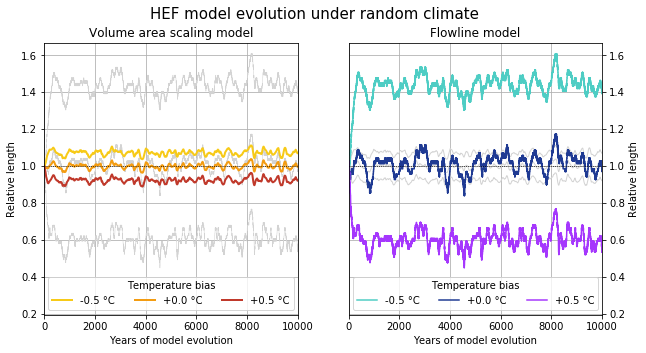

In [70]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_long.sel(mb_model='random', normalized=True),
                 var='length', suptitle=suptitle)
plt.savefig('length_norm_comparison_random.pdf', bbox_inches='tight')

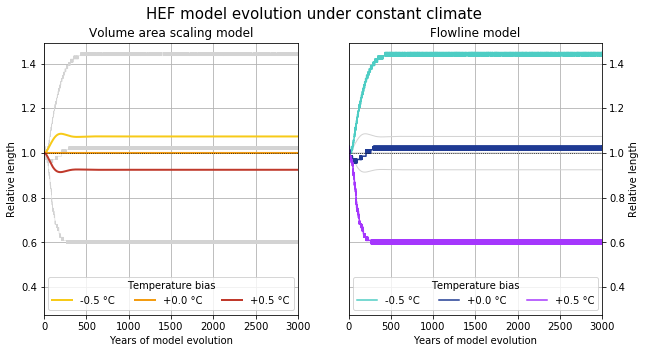

In [71]:
suptitle = 'HEF model evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True),
                 var='length', suptitle=suptitle)
plt.savefig('length_norm_comparison_constant.pdf', bbox_inches='tight')

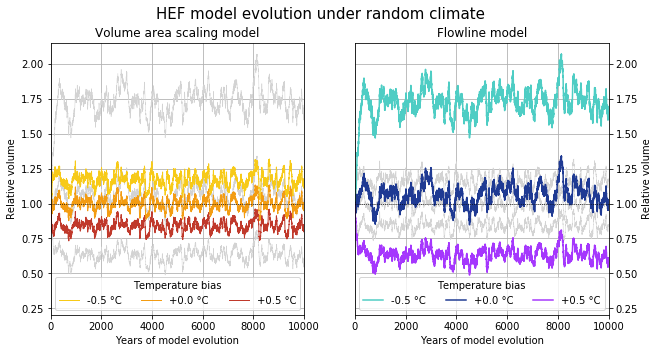

In [75]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_long.sel(mb_model='random', normalized=True),
                 var='volume', suptitle=suptitle)
plt.savefig('volume_norm_comparison_random.pdf', bbox_inches='tight')

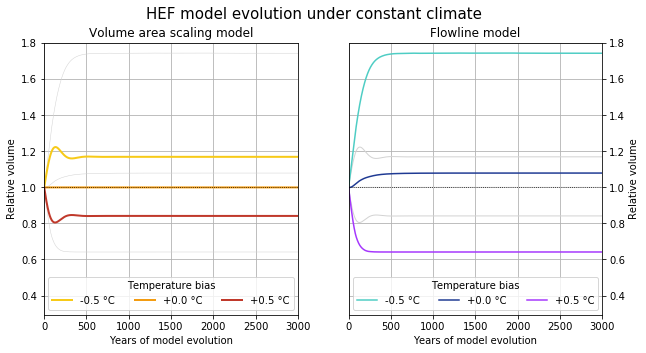

In [73]:
suptitle = 'HEF model evolution under constant climate'
plot_time_series(ds.sel(mb_model='constant', normalized=True),
                 var='volume', suptitle=suptitle)
plt.savefig('volume_norm_comparison_constant.pdf', bbox_inches='tight')

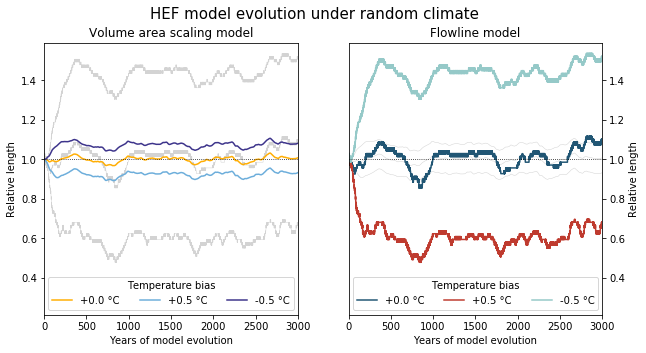

In [13]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_norm, var='length', suptitle=suptitle, normalized=True)
plt.savefig('length_norm_comparison_constant.pdf', bbox_inches='tight')

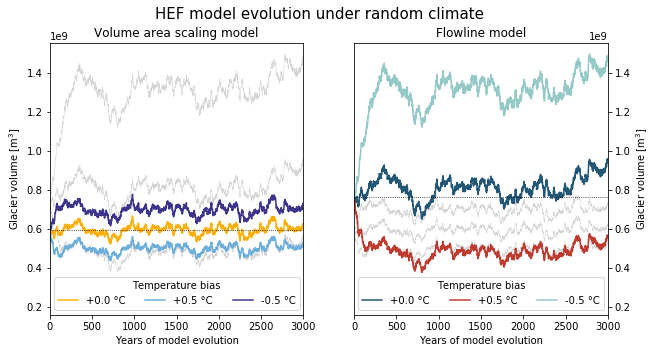

In [14]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds, var='volume', suptitle=suptitle, normalized=False)
plt.savefig('volume_comparison_constant.pdf', bbox_inches='tight')

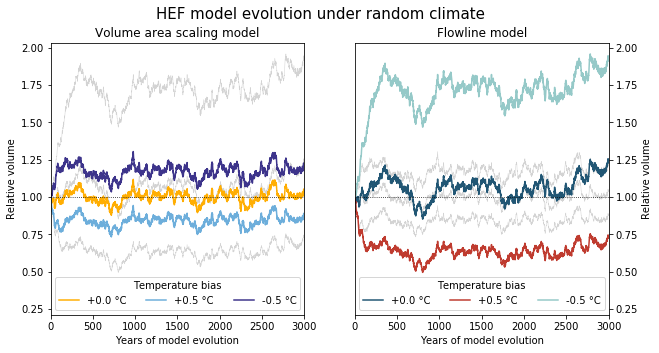

In [15]:
suptitle = 'HEF model evolution under random climate'
plot_time_series(ds_norm, var='volume', suptitle=suptitle, normalized=True)
# save plot to file
plt.savefig('volume_norm_comparison_constant.pdf', bbox_inches='tight')

### Plot time series in one panel

In [16]:
def plot_single_timeseries(ds, title='', ylabel=''):
    """
    """
    # plot relative volume change
    fig, ax = plt.subplots(1, 1, figsize=[7, 5])
    
    # set colors
    ax.set_prop_cycle('color', [vas_cycle[0], fl_cycle[0]])
    [ax.axhline(var_0, ls=':', lw=0.8, c='k') for var_0 in ds.sel(time=0).values]

    # flowline model
    handels = ds.plot(hue='model', add_legend=False)
    
    # labels, title, ...
    ax.set_title(title)
    ax.set_xlabel('Years of model evolution')
    ax.set_ylabel(ylabel)
    ax.legend(handels, ['vas', 'flowline'], title='Evolution model', ncol=2, loc=2)
    # axes
    ax.set_xlim([ds.time.min(), ds.time.max()])

In [474]:
# select single run
temp_bias = 0
# plot relative volume
plot_single_timeseries(ds_norm.volume.sel(temp_bias=temp_bias),
                       ylabel='Relative glacier volume',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('volume_norm_constant.pdf', bbox_inches='tight')

NameError: name 'plot_single_timeseries' is not defined

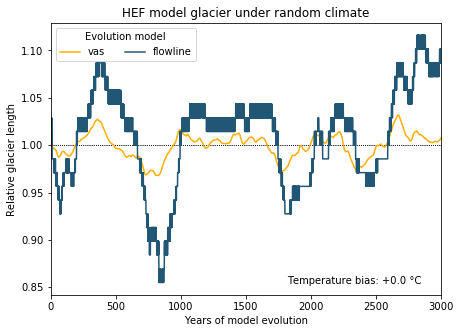

In [19]:
# plot relative length
plot_single_timeseries(ds_norm.length.sel(temp_bias=temp_bias),
                       ylabel='Relative glacier length',
                       title='HEF model glacier under random climate')
# add information about temperature bias
ax = plt.gca()
ax.text(0.95, 0.05, 'Temperature bias: {:+.1f} °C'.format(temp_bias),
        ha='right', va='center', transform=ax.transAxes)
# save plot to file
plt.savefig('length_norm_constant.pdf', bbox_inches='tight')

### Power spectrum

In [26]:
def plot_psd(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # visualize the results
    n_subplots = len(temp_bias)
    fig, axes = plt.subplots(1, n_subplots, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)
    # handle single plot
    axes = np.atleast_1d(axes)
    
    # prepare container for ylims
    ylim = list()

    for i, [b, ax] in enumerate(zip(temp_bias, axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='flowline', c=fl_cycle[0])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.loglog(freqs, psd, label='vas', c=vas_cycle[0])

        ax.set_title(title[i])

        ax.grid(which='both')
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Frequency [year$^{-1}$]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set y-limits equal for panel
    ylim = np.array(ylim).flatten()
    for ax in axes:
        ax.set_ylim([min(ylim), max(ylim)])
    
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15);

In [453]:
def plot_psd_semilog(ds, title=None, suptitle=''):
    
    # load module for the spectral analysis
    from scipy import signal
    
    # visualize the results
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))
    plt.subplots_adjust(wspace=0.05)

    # prepare labels and titles
    temp_bias = ds.temp_bias.values
    if not title:
        title = np.repeat('', temp_bias.size)
    
    # prepare container for axes limits
    xlim = list()
    ylim = list()

    for i, [b, ax] in enumerate(zip(temp_bias, axes)):
        # select values by temperature bias
        ds_tmp = ds.sel(temp_bias=b).length

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='fl').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='flowline', c=fl_cycle[0])

        # compute the power of the signel per frequency band
        sig = ds_tmp.sel(model='vas').values.flatten()
        freqs, psd = signal.welch(sig)
        ax.semilogy(freqs, psd, label='vas', c=vas_cycle[0])
        
        # set title
        ax.set_title(title[i])
        
        # get axes limits
        ax.grid(which='both')
        xlim.append(ax.get_xlim())
        ylim.append(ax.get_ylim())
        # deal with labels
        ax.set_xlabel('Repeat period [every X years]')
        if i == 0:
            # add ylabel
            ax.set_ylabel('Power')
            # add legend
            ax.legend(loc=3)
        elif i == (axes.size - 1):
            # plot ticks and labels rigth on right panel
            ax.yaxis.tick_right()
            ax.yaxis.set_label_position('right')
            ax.set_ylabel('Power')
        else:
            # remove ytick labels central (all other) pane
            ax.set_yticklabels([])
            
    # set axes limits equal for panels
    xlim = np.array(xlim).flatten()
    ylim = np.array(ylim).flatten()
    from matplotlib import ticker
    for ax in axes:
        ax.set_xlim([min(xlim), max(xlim)])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.set_ylim([min(ylim), max(ylim)])
        
    # change xticks from frequency to return period
    for ax in axes:
        xticks = ax.get_xticks()
        xticks = 1/xticks
        #xticks[np.where(np.isinf(xticks))] = 0
        ax.set_xticklabels(['{:.1f}'.format(tick) for tick in xticks])
        
    
    # add suptitle
    fig.suptitle(suptitle, fontsize=15)

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


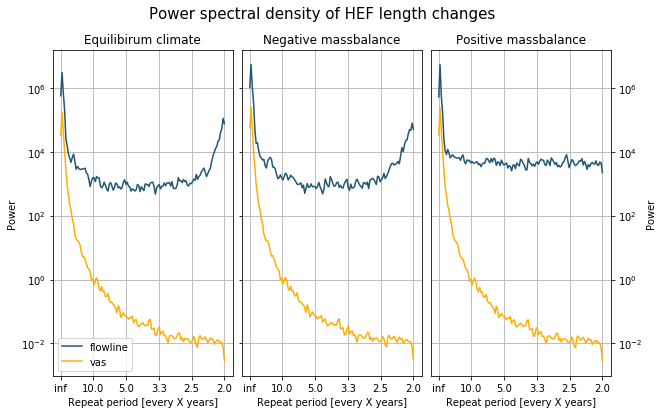

In [454]:
title = ['Equilibirum climate', 'Negative massbalance', 'Positive massbalance']
suptitle = 'Power spectral density of HEF length changes'
plot_psd_semilog(ds.sel(mb_model='random', normalized=False), title=title, suptitle=suptitle)

# save plot to file
plt.savefig('psd_length_random.pdf', bbox_inches='tight')

### Autocorrelation

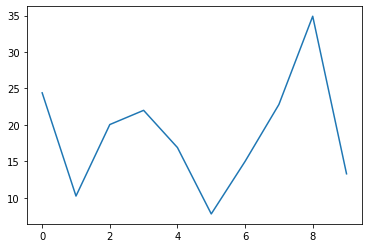

In [413]:
data = np.array([24.40,10.25,20.05,22.00,16.90,7.80,15.00,22.80,34.90,13.30])
plt.plot(data)

(array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8]),
 array([0.24256774, 0.28991447, 0.39091468, 0.4404492 , 0.48819002,
        0.50421044, 0.60974214, 0.76590164, 1.        , 0.76590164,
        0.60974214, 0.50421044, 0.48819002, 0.4404492 , 0.39091468,
        0.28991447, 0.24256774]),
 <matplotlib.lines.Line2D at 0x13e2ad358>)

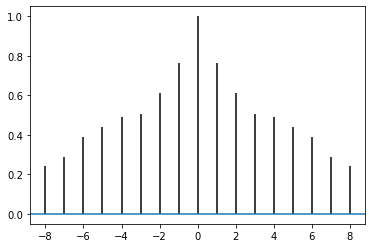

In [418]:
plt.acorr(data, maxlags=8)

In [424]:
sig = tmp.length.values
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [425]:
acf = autocorr(sig)

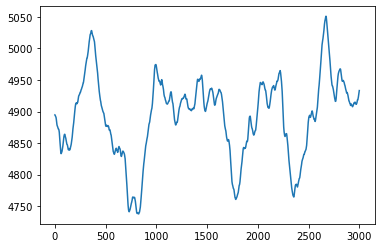

In [429]:
plt.plot(sig)

In [432]:
from statsmodels.tsa import stattools

(400, 500)

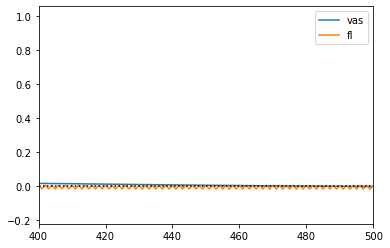

In [452]:
length = ds.sel(mb_model='constant', normalized=True, temp_bias=0.5).length
plt.plot(stattools.acf(length.sel(model='vas'), nlags=1000), label='vas')
plt.plot(stattools.acf(length.sel(model='fl'), nlags=1000, fft=True), label='fl')
plt.axhline(0, c='k', ls=':')
plt.legend()
plt.xlim([400,500])

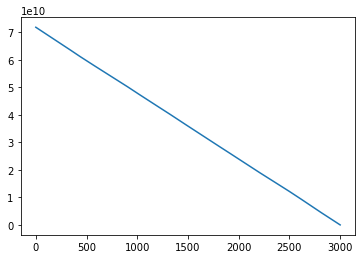

In [426]:
plt.plot(acf)